# Explore here

   duration_mins                             name  popularity
0              4               Los Mató el Estado          26
1              2                     Tenéis Speed          22
2              4  Rock'n'roll para Hijos de Perra          21


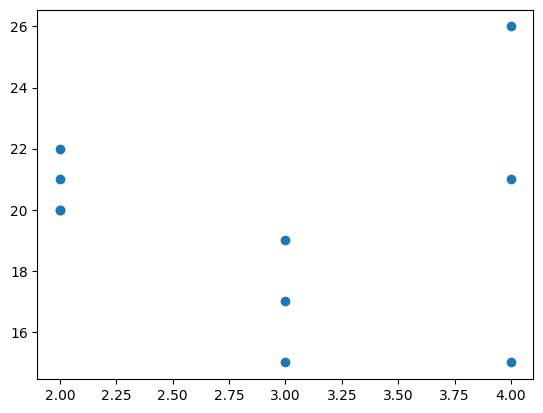

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from dotenv import load_dotenv
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

#import seaborn as sns (import not working properly so using matplotlib instead) 

# load the .env file variables
load_dotenv()

client_id = os.environ.get("CLIENT_ID")
client_secret = os.environ.get("CLIENT_SECRET")

artist_uri = 'spotify:artist:1WVMR6t5Uqq5IBqQiFYKTR' #Artist uri for this example
spotify = spotipy.Spotify(client_credentials_manager=SpotifyClientCredentials(client_id = client_id, client_secret = client_secret)) #Conection to our spotify account app

#Define a function to pass from milliseconds to minutes as the exercise requires
def mill_mins(duration_ms):
    
    return int(((duration_ms / 1000) / 60) % 60)

#Gets the top tracks in order, popularity is described as a number following a spotify propietary algorithim
results_top = spotify.artist_top_tracks(artist_uri)
top_tracks = results_top["tracks"]

#Use of dict comprehension to create another dict with the required info for the exercise (easier to create a dataframe with it)
filtered_results = [{key: mill_mins(value) if key == "duration_ms" else value for key, value in track.items() if key in ["name", "popularity", "duration_ms"]} 
                     for track in top_tracks]

#Creating the dataframe from the filtered results, they are already in order from top to bottom popularity
top_tracks_df = pd.DataFrame(filtered_results)

#The dataframe created contains the duration in mins but the dict where it comes has the wrong name so we need to change it to display correctly
top_tracks_df.rename(columns= {"duration_ms" : "duration_mins"}, inplace= True)
print(top_tracks_df.head(3))

#Creating the scatter plot from the data frame
plt.scatter(top_tracks_df["duration_mins"], top_tracks_df["popularity"])
plt.show()

